In [1]:
options(repr.plot.width=8, repr.plot.height=4)

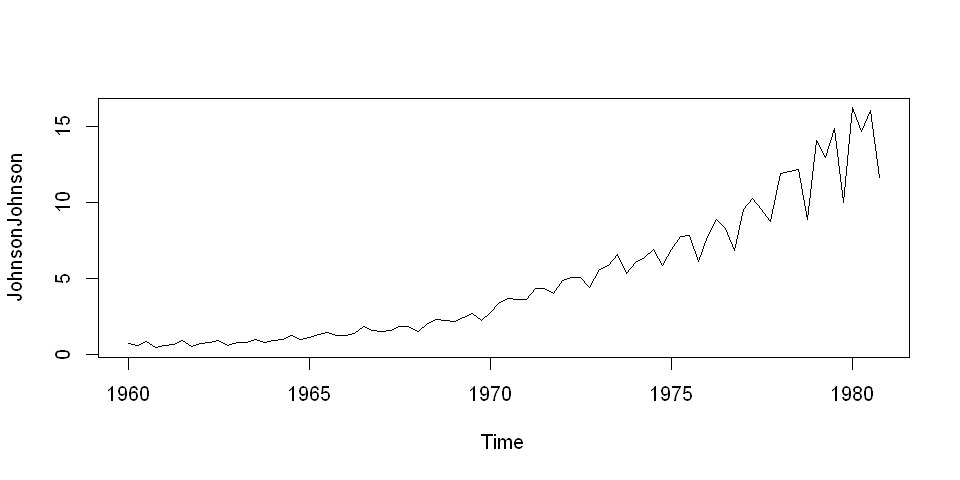

In [2]:
plot(JohnsonJohnson)

Log-return transform:
$$ r_t = \log\bigg(\frac{X_t}{X_{t-1}}\bigg) = \log(X_t) - \log(X_{t-1})$$

Log return transform

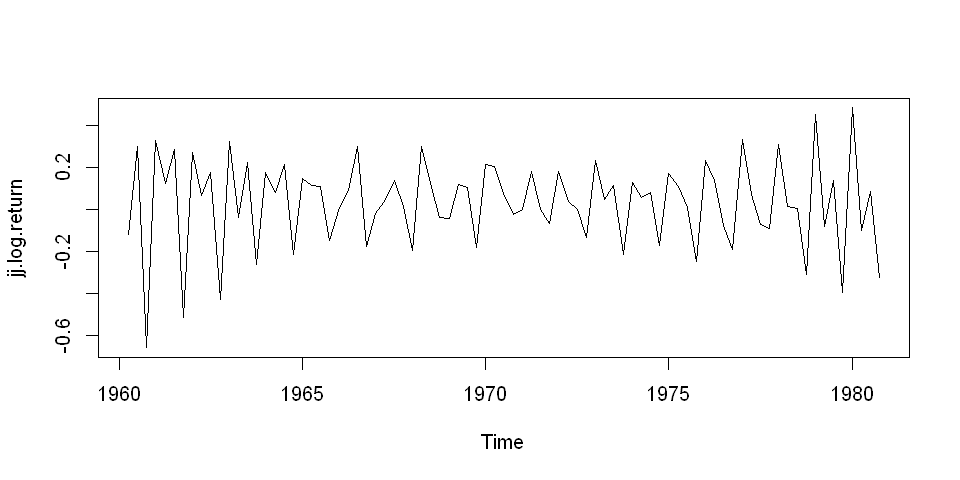

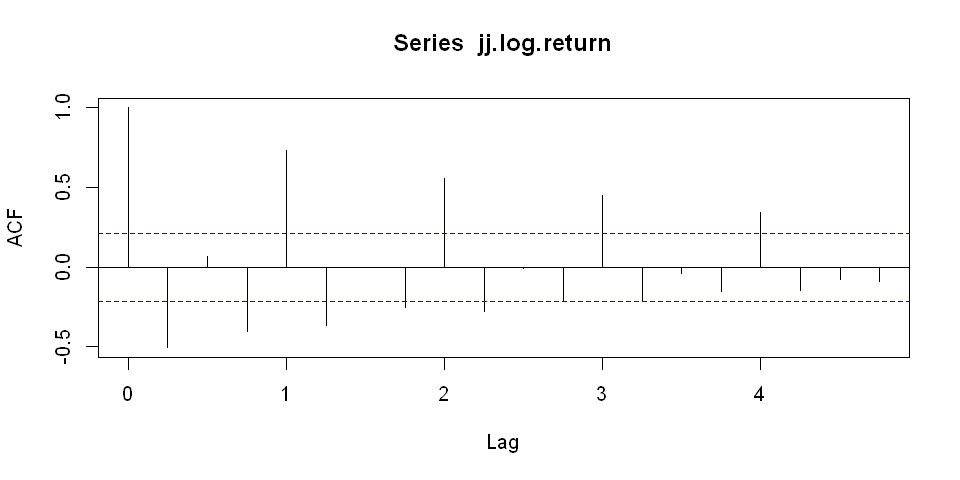

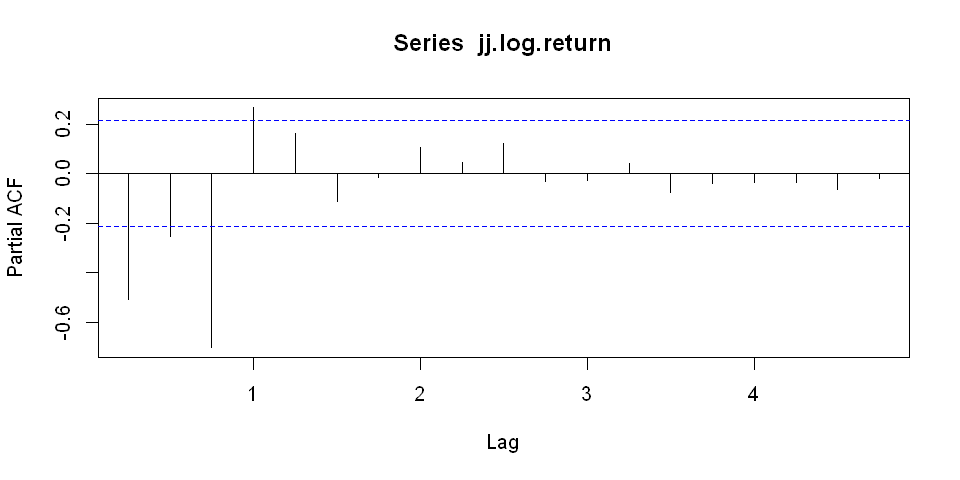

In [3]:
jj.log.return <- diff(log(JohnsonJohnson))

plot(jj.log.return)
acf(jj.log.return)
pacf(jj.log.return)

Log return with seasonal differencing

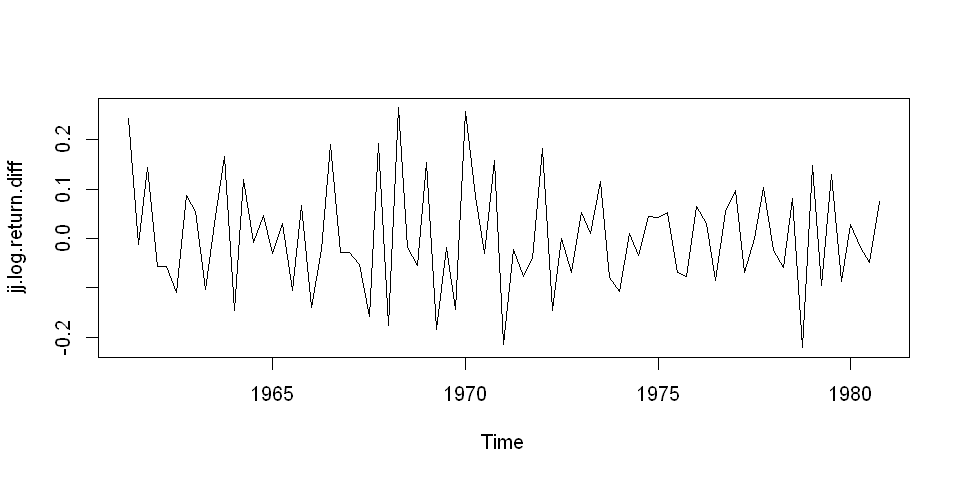

In [4]:
jj.log.return.diff <- diff(diff(log(JohnsonJohnson)), 4)
plot(jj.log.return.diff)

In [5]:
Box.test(jj.log.return.diff, lag=log(length(jj.log.return.diff)))


	Box-Pierce test

data:  jj.log.return.diff
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


p-value is small. There is autocorrelation.

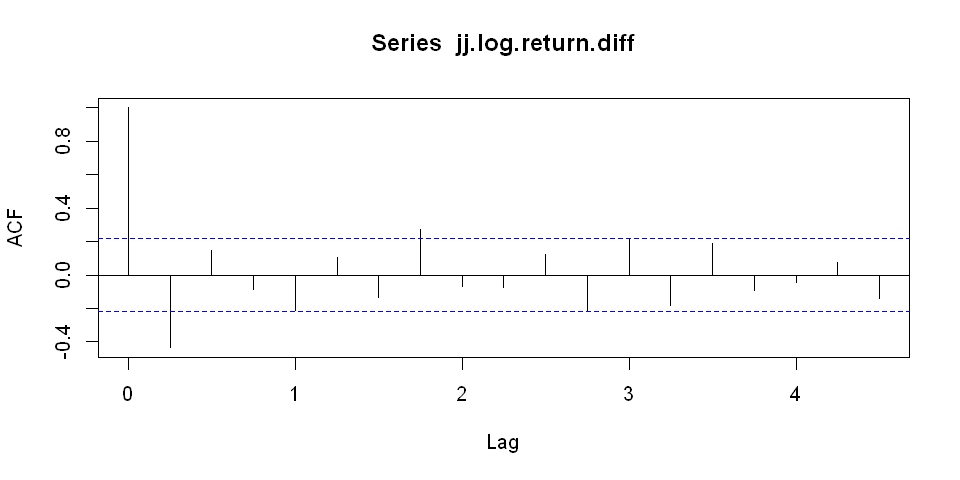

In [6]:
acf(jj.log.return.diff)

ACF suggests: 
- q = 0, 1
- Q = 0, 1 (note that s = 4)

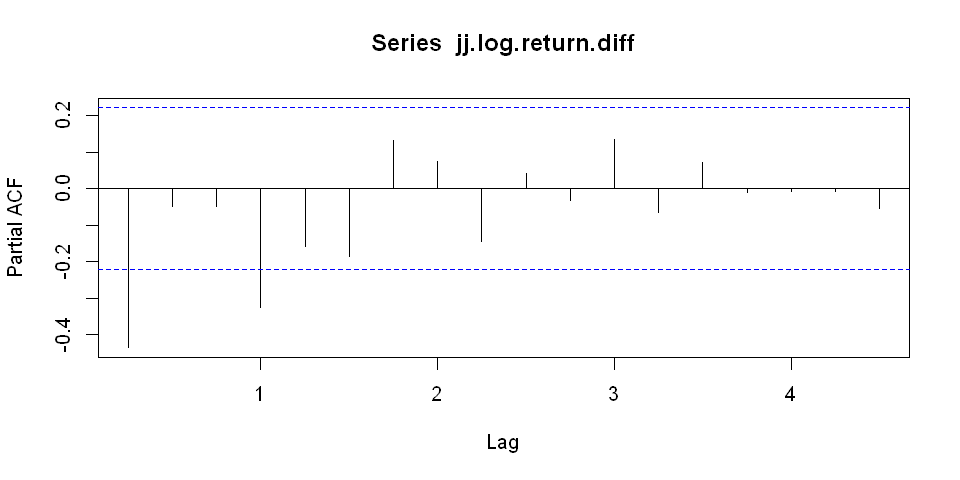

In [7]:
pacf(jj.log.return.diff)

PACF suggests:
- p = 0, 1
- P = 0, 1 (note that s = 4)

The parsimony principle

For $\mathrm{SARIMA}(p, d, q, P, D, Q)_s$, 

$$ p + d + q + P + D + Q \leq 6 $$

Search model $\mathrm{SARIMA}(p, 1, q, P, 1, Q)_s$ for $\log(JohnsonJohnson)$, where
- p = 0, 1
- q = 0, 1
- P = 0, 1
- Q = 0, 1

In [8]:
d <- 1
D <- 1
s <- 4
df.results <- data.frame()

for (p in 0:1) {
    for (q in 0:1) {
        for (P in 0:1) {
            for (Q in 0:1) {
                model <- arima(x=log(JohnsonJohnson), order=c(p, d, q), seasonal=list(order=c(P, D, Q), period=s))
                p.value <- Box.test(model$residuals, lag=log(length(model$residuals)))$p.value
                df.result <- data.frame(
                    model=paste("SARIMA(", paste(p, d, q, P, D, Q, sep=","), "), ", s, sep=""), 
                    AIC=model$aic, SSE=sum(resid(model)^2), P.value=p.value)
                df.results <- rbind(df.results, df.result)
            }
        }
    }
}

In [9]:
df.results

model,AIC,SSE,P.value
"SARIMA(0,1,0,0,1,0), 4",-124.0685,0.9377872,0.0002610792
"SARIMA(0,1,0,0,1,1), 4",-126.3493,0.8856995,0.0001606501
"SARIMA(0,1,0,1,1,0), 4",-125.9198,0.8908546,0.0001978113
"SARIMA(0,1,0,1,1,1), 4",-124.3648,0.8854555,0.0001574029
"SARIMA(0,1,1,0,1,0), 4",-145.5139,0.6891989,0.0354371687
"SARIMA(0,1,1,0,1,1), 4",-150.7528,0.6265214,0.6089541622
"SARIMA(0,1,1,1,1,0), 4",-150.9134,0.6251635,0.7079173294
"SARIMA(0,1,1,1,1,1), 4",-149.1317,0.6232876,0.6780876081
"SARIMA(1,1,0,0,1,0), 4",-139.8248,0.7467495,0.0350338569
"SARIMA(1,1,0,0,1,1), 4",-146.0191,0.6692692,0.5400206229


In [10]:
df.results[which.min(df.results$AIC),]

,model,AIC,SSE,P.value
7,"SARIMA(0,1,1,1,1,0), 4",-150.9134,0.6251635,0.7079173


Choose $\mathrm{SARIMA}(0, 1, 1, 1, 1, 0)_4$ with smallest AIC (-150.9134).

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446737
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.840408

$AICc
[1] -1.838555

$BIC
[1] -1.753721


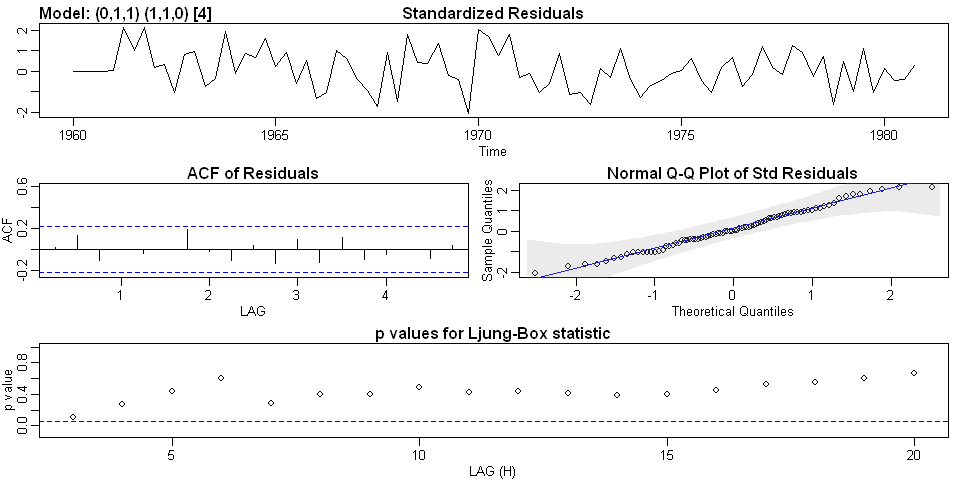

In [11]:
library(astsa)

sarima(log(JohnsonJohnson), 0, 1, 1, 1, 1, 0, 4)

Final model: 

$$ (1 - B)(1 - B^4)(1 - \Phi B^4) Y_t =  (1 + \theta B)e_t$$

$$ Y_t = Y_{t-1} + (\Phi+1)Y_{t-4} - (\Phi-1)Y_{t-5} - \Phi Y_{t-8} + \Phi Y_{t-9} + e_t + \theta e_{t-1} $$

Where $Y_t = \log(JohnsonJohnson)$, $\Phi = -0.3220$, $\theta = -0.6796$, $e_t \sim N(0, 0.007913)$.

$$ Y_t = Y_{t-1} + 0.6789Y_{t-4} - 0.6789Y_{t-5} + 0.3220Y_{t-8} -  0.3220Y_{t-9} + e_t - 0.6796e_{t-1} $$


Forecast

Warning message:
"package 'forecast' was built under R version 3.6.1"

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1981 Q1       2.910254 2.796250 3.024258 2.735900 3.084608
1981 Q2       2.817218 2.697507 2.936929 2.634135 3.000300
1981 Q3       2.920738 2.795580 3.045896 2.729325 3.112151
1981 Q4       2.574797 2.444419 2.705175 2.375401 2.774194
1982 Q1       3.041247 2.868176 3.214317 2.776559 3.305934
1982 Q2       2.946224 2.762623 3.129824 2.665431 3.227016
1982 Q3       3.044757 2.851198 3.238316 2.748735 3.340780
1982 Q4       2.706534 2.503505 2.909564 2.396028 3.017041

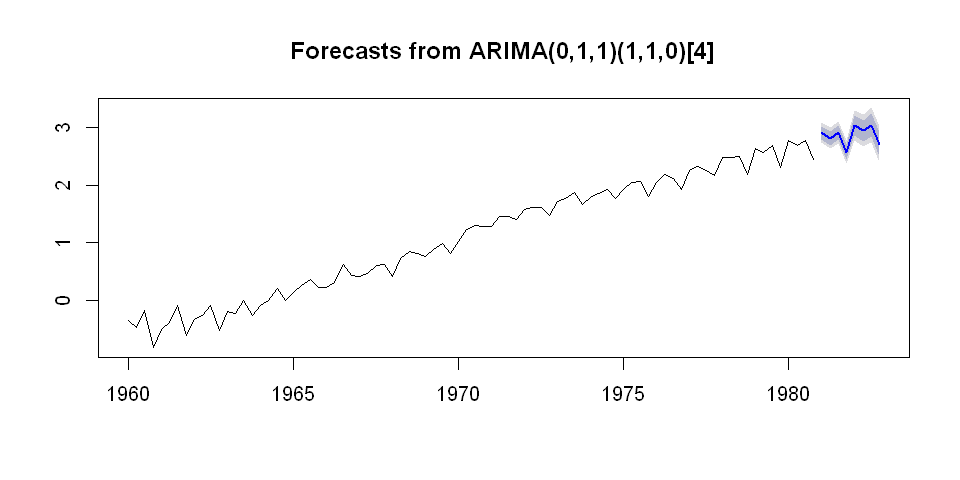

In [12]:
suppressMessages(library(forecast))

model <- arima(x=log(JohnsonJohnson), order=c(0, 1, 1), seasonal=list(order=c(1, 1, 0), period=4))
jj.forecast <- forecast(model)
jj.forecast
plot(jj.forecast)